In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [4]:
# Load and clean data
df = pd.read_csv("Historical_data.csv", parse_dates=["Date"], index_col="Date", dtype=str)
df.replace({r"[\$,]": ""}, regex=True, inplace=True)
df = df.astype("float64")

# Sort data chronologically (ascending)
df = df.sort_index(ascending=True)

# Calculate log returns
log_returns = np.log(df / df.shift(1)).dropna()

In [5]:
# Annualize mean returns and covariance matrix
trading_days = 252
annual_mean = log_returns.mean() * trading_days
annual_cov = log_returns.cov() * trading_days

In [8]:
# Define objective function: maximize portfolio returns (minimize negative returns)
def max_return_objective(weights, ann_mean):
    return -np.dot(weights, ann_mean)

In [6]:
# Constraints and bounds for weights (long-only, sum to 1)
n_assets = len(annual_mean)
bounds = tuple((0, 1) for _ in range(n_assets))
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
init_guess = n_assets * [1.0 / n_assets]


In [7]:
# 7. Optimize portfolio weights for maximum return
result = minimize(
    max_return_objective,
    init_guess,
    args=(annual_mean,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
max_ret_weights = result.x

In [9]:
# Portfolio performance calculations
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(weights.T @ cov_matrix @ weights)
    return port_return, port_volatility

max_ret_return, max_ret_volatility = portfolio_performance(max_ret_weights, annual_mean, annual_cov)
max_ret_sharpe = max_ret_return / max_ret_volatility

In [10]:
# Print results
print("Maximum Returns Portfolio Weights:")
for asset, weight in zip(annual_mean.index, max_ret_weights):
    print(f"{asset}: {weight:.4f}")
print(f"\nExpected Annual Return: {max_ret_return:.4f}")
print(f"Expected Annual Volatility: {max_ret_volatility:.4f}")
print(f"Sharpe Ratio: {max_ret_sharpe:.4f}")

Maximum Returns Portfolio Weights:
AAPL: 0.0000
AMZN: 0.0000
GOOGL: 0.0000
MSFT: 0.0000
TSLA: 0.0000
NVDA: 1.0000
META: 0.0000

Expected Annual Return: 0.5525
Expected Annual Volatility: 0.5267
Sharpe Ratio: 1.0490


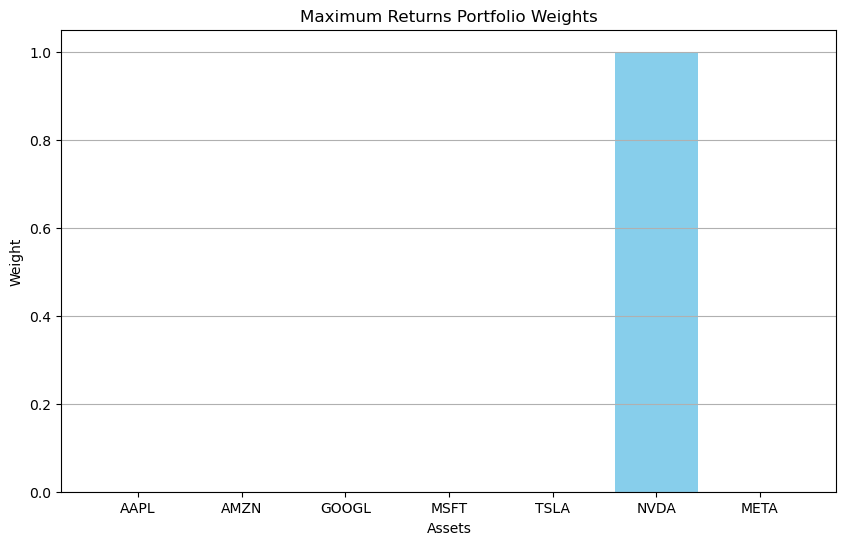

In [11]:
# Plot weights
plt.figure(figsize=(10, 6))
plt.bar(annual_mean.index, max_ret_weights, color='skyblue')
plt.title("Maximum Returns Portfolio Weights")
plt.ylabel("Weight")
plt.xlabel("Assets")
plt.grid(axis='y')
plt.show()

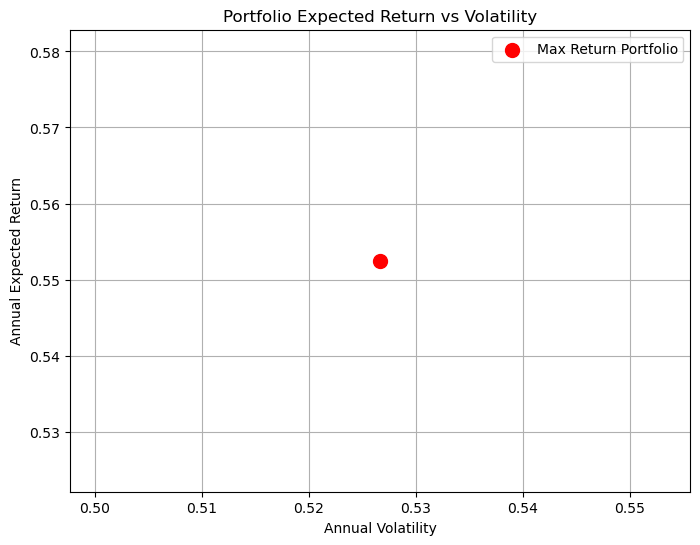

In [13]:
# Plot risk-return point
plt.figure(figsize=(8, 6))
plt.scatter(max_ret_volatility, max_ret_return, color='red', label='Max Return Portfolio', s=100)
plt.title("Portfolio Expected Return vs Volatility")
plt.xlabel("Annual Volatility")
plt.ylabel("Annual Expected Return")
plt.grid(True)
plt.legend()
plt.show()